In [36]:
#import necessory libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [19]:
# Load the Google stock prices dataset
df = pd.read_csv('Google_Stock_Price_Train.csv')
print(df.head())

       Date    Open    High     Low   Close      Volume
0  1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1  1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2  1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3  1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4  1/9/2012  322.04  322.29  309.46  620.76  11,688,800


In [20]:
# Extract Open prices
prices = df['Open'].values
prices

array([325.25, 331.27, 329.83, ..., 793.7 , 783.33, 782.75])

In [21]:
# Reshape price values from 1D array to 2 D array
prices = prices.reshape(-1, 1)
prices

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [22]:
# Normalize the prices using Min-Max scaling
scaler = MinMaxScaler(feature_range=(0, 1))
prices_scaled = scaler.fit_transform(prices)
prices_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [23]:
# Split the data into train and test sets (80% train, 20% test)
train_size = int(len(prices_scaled) * 0.8)
test_size = len(prices_scaled) - train_size
train_data = prices_scaled[0:train_size]
test_data = prices_scaled[train_size:len(prices_scaled)]

In [24]:
# Function to create X and y datasets from time series data
def create_dataset(dataset, time_step):
    X, y = [], []
    for i in range(len(dataset)-time_step-1):
        X.append(dataset[i:(i+time_step), 0])
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

In [25]:
# Define the time step for sequence prediction
time_step = 60

# Create the X and y datasets
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [26]:
# Reshape the input data to be 3D (batch_size, time_step, features)
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [28]:
# Build the RNN model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)),
    LSTM(units=50, return_sequences=True),
    LSTM(units=50),
    Dense(units=1)
])

C:\Users\abhishek\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
# compile model
model.compile(
  loss='mean_squared_error',
  optimizer='adam',
)

In [30]:
# Train the model
model.fit(x_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step - loss: 0.1258
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0127
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 0.0050
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0035
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0035
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0036
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0034
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - loss: 0.0031
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - loss: 0.0034
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 0.0031
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0031
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - loss: 0.0031
Epoch 13/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.0030
Epoch 14/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0027
Epoch 15/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - 

In [31]:
# Predictions
y_pred = model.predict(x_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step


In [32]:
# Inverse scaling to get actual prices
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform([y_test])

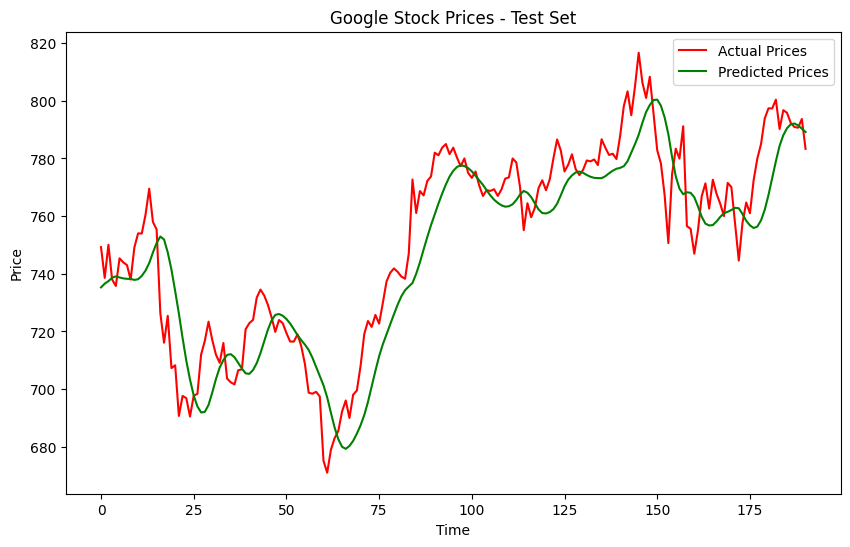

In [39]:
# Plot the test predictions vs. actual prices
plt.figure(figsize=(10,6))
plt.plot(y_test.flatten(), label='Actual Prices', color='red')
plt.plot(y_pred.flatten(), label='Predicted Prices', color='green')
plt.title('Google Stock Prices - Test Set')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()